<a href="https://colab.research.google.com/github/FOUNDMYPATH/Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
training_data = pd.read_csv(path,names=headernames)
training_data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


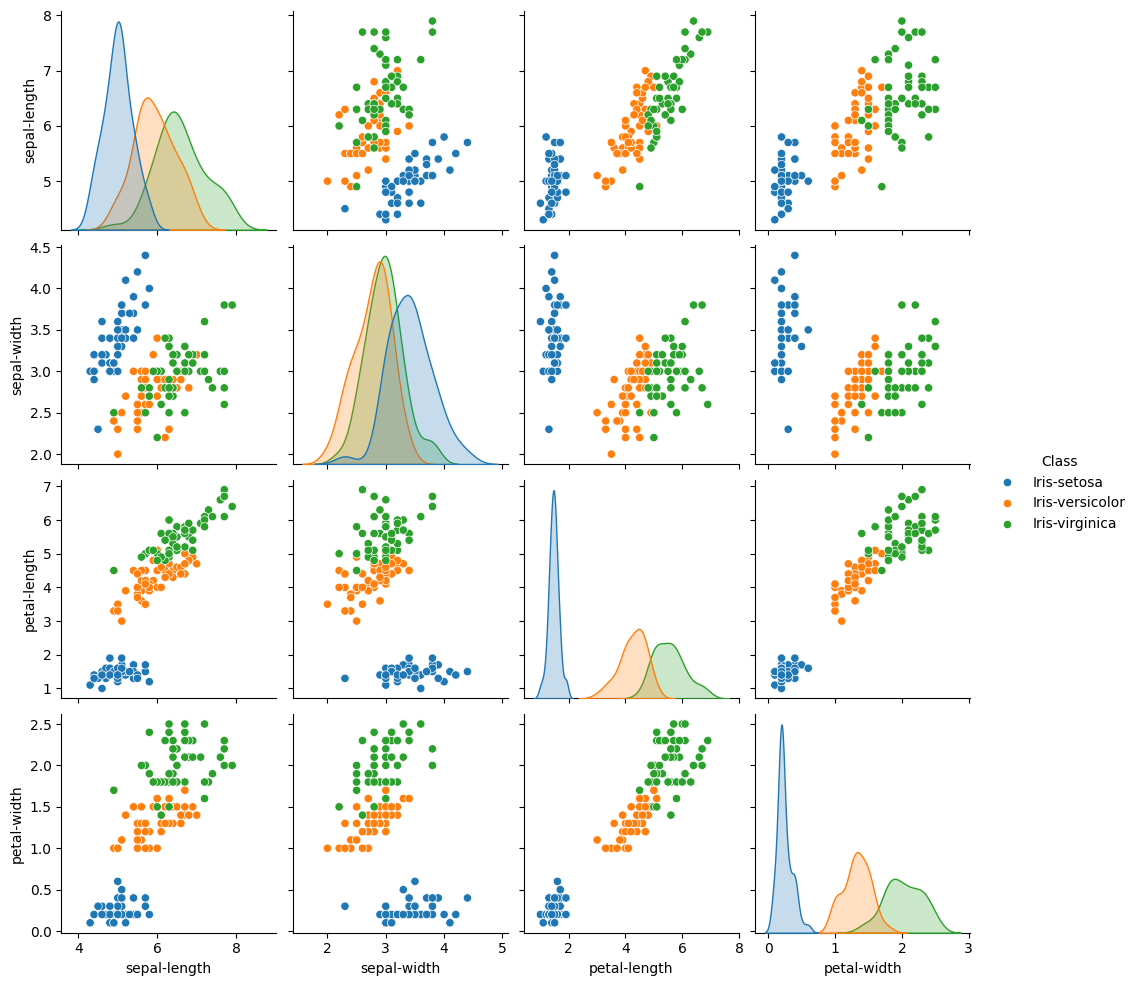

In [ ]:
sns.pairplot(data = training_data,hue = "Class")

For decision tree no standard scaling is required

In [ ]:
Xpd = training_data.drop("Class",axis=1)
ypd= training_data["Class"]

In [ ]:
X= Xpd.values
y= ypd.values

The data that we are using is a perfectly balanced data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
clf = DecisionTreeClassifier(criterion = "gini",max_depth=3)
end = time.time()
print("gini",end-start)
start = time.time()
clf1 = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
end = time.time()
print("entropy",end-start)
start = time.time()
clf2 = DecisionTreeClassifier(criterion = "log_loss",max_depth=3)
end = time.time()
print("log-loss",end-start)

clf_weight = DecisionTreeClassifier(criterion = "log_loss",max_depth=3,class_weight={'Iris-setosa':1,'Iris-versicolor':1,'Iris-virginica':3})

gini 8.034706115722656e-05
entropy 8.130073547363281e-05
log-loss 6.771087646484375e-05


In [ ]:
def fit_model(model,*args,**kwargs):
  start = time.time()
  model.fit(*args,**kwargs)
  end = time.time()
  print("timetaken",end-start)


In [ ]:
fit_model(clf,X_train,y_train)
fit_model(clf1,X_train,y_train)
fit_model(clf2,X_train,y_train)
fit_model(clf_weight,X_train,y_train)

timetaken 0.0027620792388916016
timetaken 0.0034961700439453125
timetaken 0.0028617382049560547
timetaken 0.0029799938201904297


In [ ]:
clf.classes_
clf.feature_importances_
clf.n_outputs_
clf.n_features_in_

4

In [ ]:
def final_metrics(model,y_test,y_pred,xticklabels,yticklabels):
  result = confusion_matrix(y_test, y_pred)
  sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=xticklabels,
            yticklabels=yticklabels)
  plt.ylabel('Actual',fontsize=13)
  plt.xlabel('Prediction',fontsize=13)
  plt.title('Confusion Matrix',fontsize=17)
  plt.show()

  result1 = classification_report(y_test, y_pred)
  print("#################################")
  print("Classification Report:",)
  print (result1)
  print("#################################")

  plt.figure()
  plot_tree(model, filled=True,feature_names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],class_names=model.classes_)
  plt.title("Decision tree trained on all the iris features")
  plt.show()

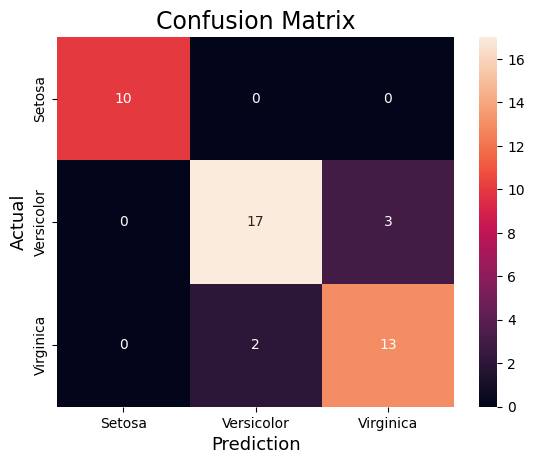

#################################
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.85      0.87        20
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89        45
      macro avg       0.90      0.91      0.90        45
   weighted avg       0.89      0.89      0.89        45

#################################


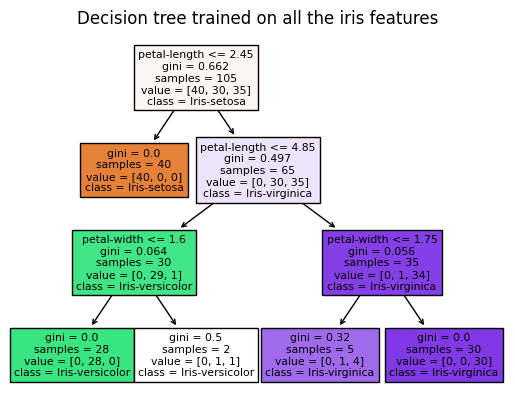

In [ ]:
y_pred = clf.predict(X_test)
final_metrics(clf,y_test, y_pred,['Setosa','Versicolor', 'Virginica'],['Setosa','Versicolor', 'Virginica'])

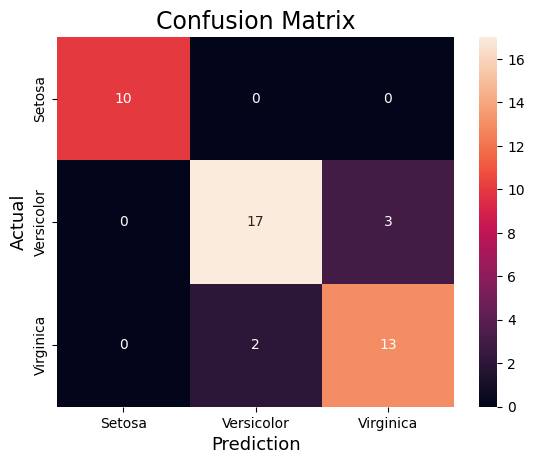

#################################
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.85      0.87        20
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89        45
      macro avg       0.90      0.91      0.90        45
   weighted avg       0.89      0.89      0.89        45

#################################


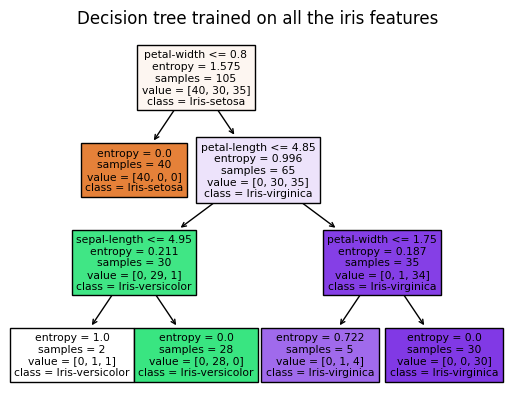

In [ ]:
y_pred = clf1.predict(X_test)
final_metrics(clf1,y_test, y_pred,['Setosa','Versicolor', 'Virginica'],['Setosa','Versicolor', 'Virginica'])

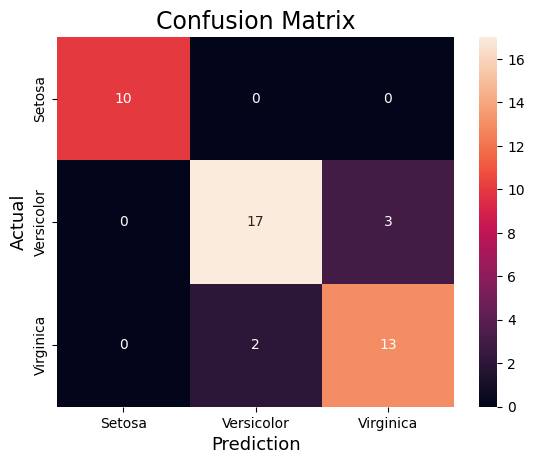

#################################
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.85      0.87        20
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89        45
      macro avg       0.90      0.91      0.90        45
   weighted avg       0.89      0.89      0.89        45

#################################


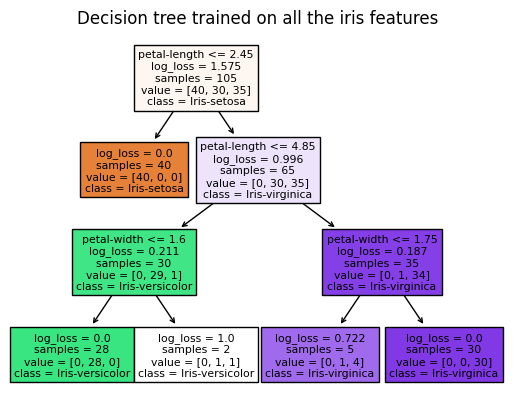

In [ ]:
y_pred = clf2.predict(X_test)
final_metrics(clf2,y_test, y_pred,['Setosa','Versicolor', 'Virginica'],['Setosa','Versicolor', 'Virginica'])

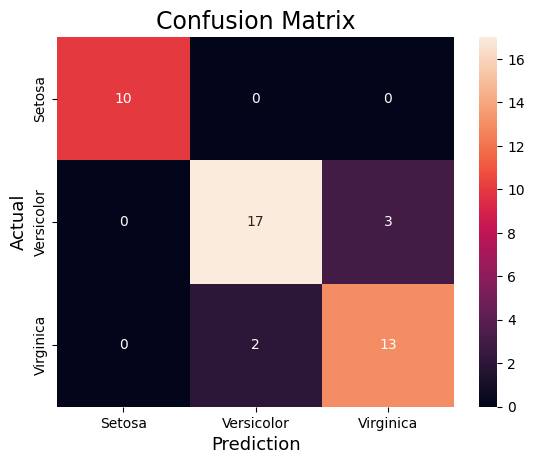

#################################
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.85      0.87        20
 Iris-virginica       0.81      0.87      0.84        15

       accuracy                           0.89        45
      macro avg       0.90      0.91      0.90        45
   weighted avg       0.89      0.89      0.89        45

#################################


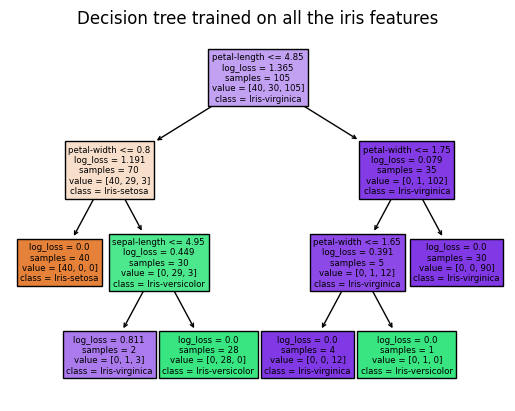

In [ ]:
y_pred = clf_weight.predict(X_test)
final_metrics(clf_weight,y_test, y_pred,['Setosa','Versicolor', 'Virginica'],['Setosa','Versicolor', 'Virginica'])

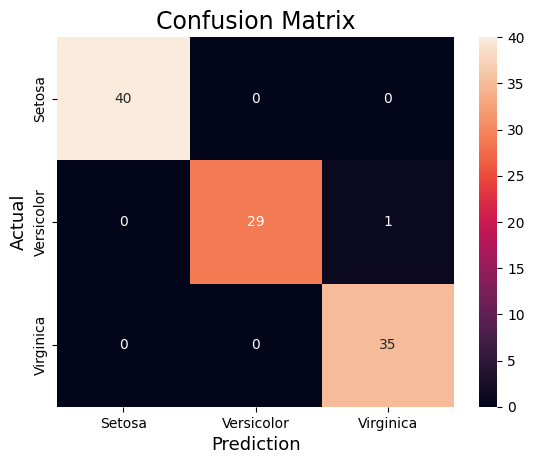

#################################
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      0.97      0.98        30
 Iris-virginica       0.97      1.00      0.99        35

       accuracy                           0.99       105
      macro avg       0.99      0.99      0.99       105
   weighted avg       0.99      0.99      0.99       105

#################################


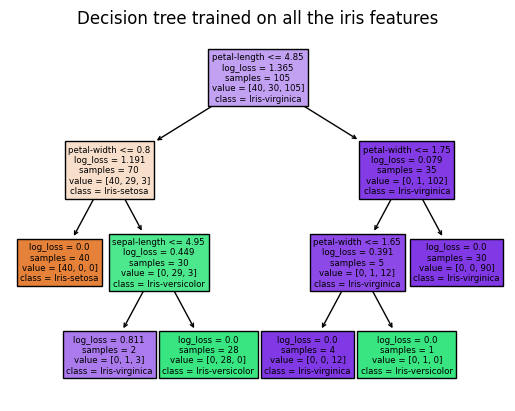

In [ ]:
y_pred = clf_weight.predict(X_train)
final_metrics(clf_weight,y_train, y_pred,['Setosa','Versicolor', 'Virginica'],['Setosa','Versicolor', 'Virginica'])

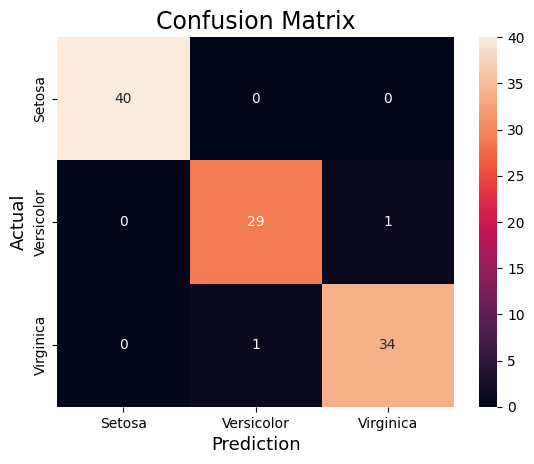

#################################
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.97      0.97        30
 Iris-virginica       0.97      0.97      0.97        35

       accuracy                           0.98       105
      macro avg       0.98      0.98      0.98       105
   weighted avg       0.98      0.98      0.98       105

#################################


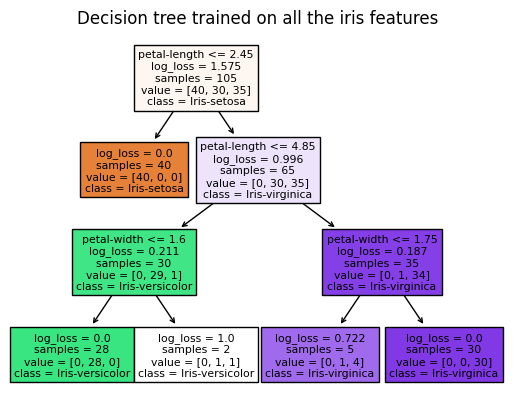

In [ ]:
y_pred = clf2.predict(X_train)
final_metrics(clf2,y_train, y_pred,['Setosa','Versicolor', 'Virginica'],['Setosa','Versicolor', 'Virginica'])

##PRECISION vs RECALL in Desicion Tree
Increase class weights increases Recall not precision

But in turn it increases the precision of the other class